# 🚢 Titanic Survival Prediction using ANN
## 🧠 Deep Learning Project

### 📌 Project Overview
- Predict **survival** of Titanic passengers using **Artificial Neural Networks (ANN)**.
- Dataset: `titanic.csv` (loaded from seaborn).
- Model: Binary classification using **TensorFlow/Keras**.

In [4]:
import sys
import os

# Add the 'src' folder to Python's module search path
sys.path.append(os.path.abspath('../src'))

# Now import from src
from preprocess import load_and_preprocess_data
from model import create_model
from tensorflow.keras.models import load_model

In [5]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

# Show first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Load and preprocess the data
X_train, X_valid, X_test, y_train, y_valid, y_test, input_shape = load_and_preprocess_data()

# Check dataset size
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_valid.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 623
Validation samples: 134
Test samples: 134


/Users/mac/DeepLearning_Project/src/preprocess.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/Users/mac/DeepLearning_Project/src/preprocess.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [7]:
from keras.callbacks import EarlyStopping

# Create the ANN model
model = create_model(input_shape)
model.summary()

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3791 - loss: 0.7184 - val_accuracy: 0.4403 - val_loss: 0.6888
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4399 - loss: 0.6960 - val_accuracy: 0.5896 - val_loss: 0.6792
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5542 - loss: 0.6863 - val_accuracy: 0.6642 - val_loss: 0.6718
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6302 - loss: 0.6766 - val_accuracy: 0.7090 - val_loss: 0.6620
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7145 - loss: 0.6644 - val_accuracy: 0.7313 - val_loss: 0.6541
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.6628 - val_accuracy: 0.7985 - val_loss: 0.6430
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.6457 - val_accuracy: 0.7985 - val_loss: 0.6267
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7692 - loss: 0.6423 - val_accuracy: 0.7985 - val_loss:

In [8]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8181 - loss: 0.4393 
Test Accuracy: 0.81


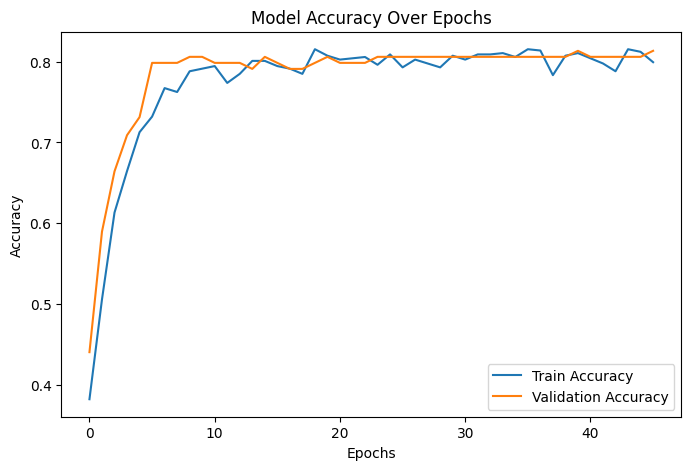

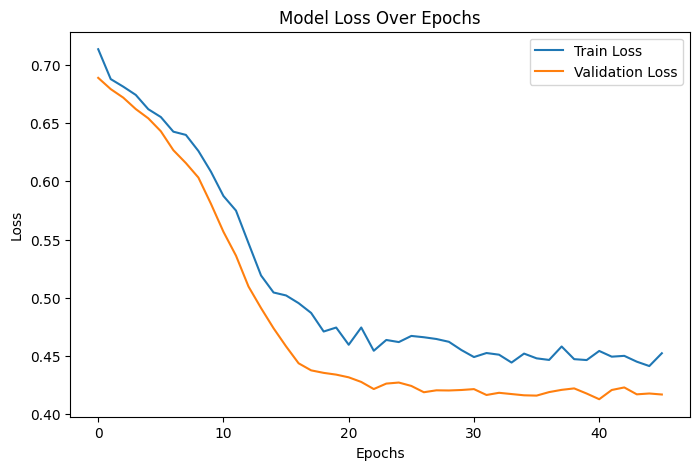

In [9]:
# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
#this just for generate a dataset
# Generate a sample Titanic dataset
data = {
    "PassengerId": np.arange(1, 11),
    "Pclass": np.random.choice([1, 2, 3], size=10),
    "Name": [
        "Braund, Mr. Owen", "Cumings, Mrs. John", "Heikkinen, Miss. Laina",
        "Futrelle, Mrs. Jacques", "Allen, Mr. William", "Moran, Mr. James",
        "McCarthy, Mr. Timothy", "Palsson, Master. Gosta", "Johnson, Mrs. Oscar",
        "Nasser, Mrs. Nicholas"
    ],
    "Sex": np.random.choice(["male", "female"], size=10),
    "Age": np.random.uniform(18, 60, size=10).round(1),
    "SibSp": np.random.randint(0, 3, size=10),
    "Parch": np.random.randint(0, 3, size=10),
    "Ticket": np.random.randint(100000, 999999, size=10).astype(str),
    "Fare": np.random.uniform(7.0, 100.0, size=10).round(2),
    "Cabin": np.random.choice(["C85", "C123", "B42", "NaN", "E31"], size=10),
    "Embarked": np.random.choice(["C", "Q", "S"], size=10),
    "Survived": np.random.choice([0, 1], size=10)  # Binary classification (0=No, 1=Yes)
}

# Convert to DataFrame
df_titanic = pd.DataFrame(data)

# Save as CSV file
df_titanic.to_csv("dataset.csv", index=False)

print("Titanic dataset saved as titanic_sample.csv")


Titanic dataset saved as titanic_sample.csv


In [10]:
# Save the trained model
model.save("titanic_model.h5")
print("Model saved successfully.")

Model saved successfully.


In [11]:
# Load saved model
loaded_model = load_model("titanic_model.h5")

# Make predictions
sample = X_test[:5]  # Take 5 test samples
predictions = loaded_model.predict(sample)

# Convert predictions to binary (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32")

print("Predictions:", predicted_classes.flatten())
print("Actual values:", y_test[:5].values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predictions: [0 0 1 0 0]
Actual values: [0. 0. 1. 0. 0.]
